In [1]:
%pylab inline
from scipy.signal import correlate
from scipy.ndimage.interpolation import shift
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Correlation

**The goal of this notebook is to learn how to use Cross-correlation to compensate the lag on time between two signals**

Correlation is the degree of simmilarity between two time series or signal in the same time or sequence while no lag is considered.

$R_{xy}[l]=\sum_{n=-\infty}^{\infty}x[n]y^{*}[n-l]$

<strong> * </strong> represent conjugate of the signal

**$l$** lag of the signal

# 1.- Autocorrelation
x=y

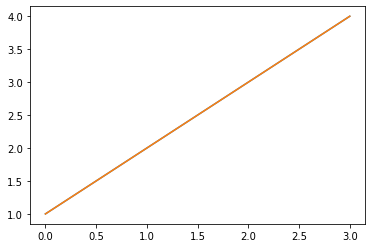

In [2]:
#Vector to autocorrelate
x=[1,2,3,4]
y=x
plt.plot(x)
plt.plot(y)



In [3]:
#Calculate the correlation
c=correlate(x,y)
print("Correlation=",c)

Correlation= [ 4 11 20 30 20 11  4]


### Plot the correlation.
### What is the intuition behind it?

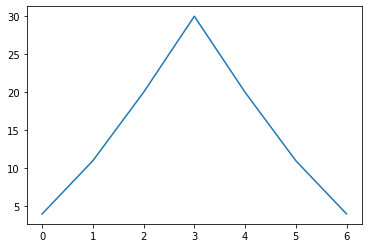

In [4]:
#Plot the correlation
plt.plot(c)

# 2.- Cross correlation

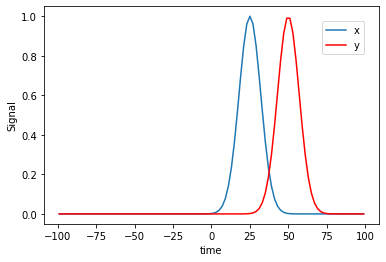

In [5]:

N = 100 #Number of samples
a =  .5  #scale parameter
time = np.linspace(-N+1, N-1, num=N)
x = (np.exp(-((time-25)*.01)**2/.01)) 
plt.plot(time,x,label="x")
y =np.exp(-((time-N/2)*.01)**2/.01 )
 
plt.plot(time,y,'r',label="y")
plt.xlabel('time')
plt.ylabel('Signal')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc=1, borderaxespad=1.5)

### Calculate the cross-correlation

In [6]:
cross_correlation=correlate(x,y)
print(len(cross_correlation))
print(len(x))
print(len(y))

199
100
100


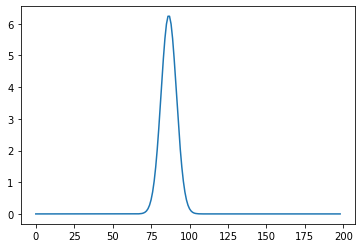

In [7]:
plt.plot(cross_correlation)

# 3.- Use cross-Correlation to compensate the offset between signals
Tip:
Use **scipy.ndimage.shift(input,shift,cval)**

Shift an array
**input**: The input array.

**shift**: The shift along the axes.

**cval**: Value to fill past edges of input if mode is ‘constant’. Default is 0.0.



87
-12


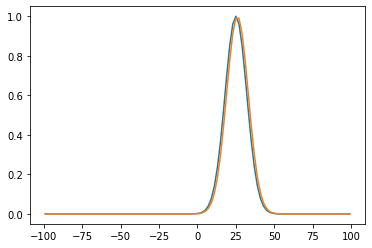

In [8]:
#Write your code here
maxx = np.argmax(cross_correlation)
print(maxx)
sh = maxx - (N - 1)
print(sh)
newy = shift(y,sh)
plt.plot(time, x, label='x')
plt.plot(time, newy, label='newyy')

### Exercise 2:
Given two sginals, $x$ and $y$, compensate the lag using cross-correlation

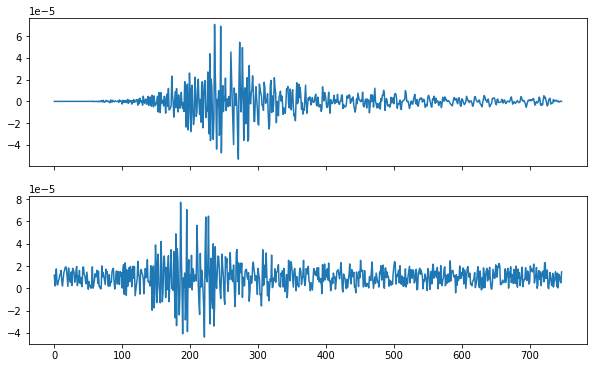

In [9]:
time_series = ['BO.NOK']
dirName = "./"
fs = 748  # take 748 samples only
MR = len(time_series)
Y = np.zeros((MR, fs))
dictVals = {}
filename = dirName + time_series[0] + ".txt"
df = pd.read_csv(filename, names=['time', 'U'], skiprows=1, delimiter='\s+')  # reading file as pandas dataframe to work easily
# this code block is required as the different time series has not even sampling, so dealing with each data point separately comes handy
# can be replaced by simply `yvalues = df['U]`
yvalues = []
for i in range(1, fs+1):
    val = df.loc[df['time'] == i]['U'].values[0]
    yvalues.append(val)

# Signal_1
x = np.squeeze(np.asarray(pd.DataFrame(yvalues)),axis=-1) 
# Signal_2=Signal_1+noise
y=np.concatenate((x[50:],x[697:747]),axis=0)+ np.random.rand(748,)*0.00002
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax[0].plot(x,label="x")
ax[1].plot(y,label="y")


748
748
797
50


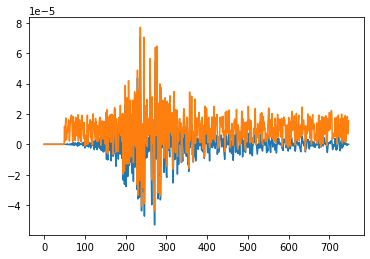

In [10]:

#Write your code here
print(len(x))
print(len(y))

corr = correlate(x,y)
maxx = np.argmax(corr)
print(maxx)
sh = maxx - (fs - 1)
print(sh)
newy = shift(y,sh)
plt.plot(x, label='x')
plt.plot(newy, label='newyy')
